## This notebook demonstrates the use of K means clustering in effectively clustering/ separation of closely related datapoints.

In [1]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=400, centers=4, cluster_std=1)

### our variable y here consists of class information which we will eventually use for validation, while x is an n x 2 array. 
#### Let us plot x

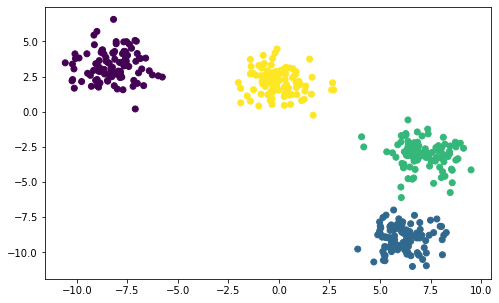

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(x[:,0], x[:,1], c=y)

### Our dataset clearly shows 4 different clusters and are colored by their classes given in variable y

### We now try to apply our Kmeans unsupervised technique to create a model and identify classes.

In [23]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, max_iter=1000)
kmeans.fit(x)
labels=kmeans.predict(x)

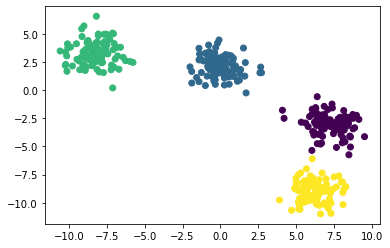

In [24]:
plt.scatter(x[:,0], x[:,1], c=labels)

### When we plotted the clusters, we did not use the y variable which was given to use, infact we used the labels variable obtained from the kmeans model we created.

### In most cases we would not know what the optimal number of clusters are so let's find out from the 'Elbow Method' what should our optimal cluster look like.

In [33]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\varulobo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


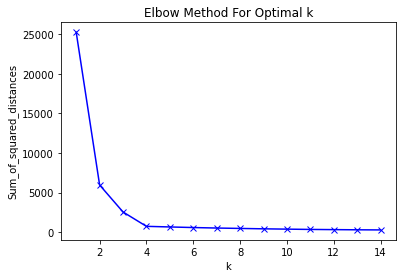

In [35]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## We see here that the sum of squeare errors elbows at 4 after which there is convergence observed. This method is ideal to identify the optimal number of clusters our dataset must have.